<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Explore-The-Dataset" data-toc-modified-id="Challenge-1---Explore-The-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Explore The Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-data-from-an-bird's-eye-view." data-toc-modified-id="Explore-the-data-from-an-bird's-eye-view.-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the data from an bird's-eye view.</a></span></li><li><span><a href="#Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated." data-toc-modified-id="Next,-evaluate-if-the-columns-in-this-dataset-are-strongly-correlated.-2.0.0.2"><span class="toc-item-num">2.0.0.2&nbsp;&nbsp;</span>Next, evaluate if the columns in this dataset are strongly correlated.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Remove-Column-Collinearity." data-toc-modified-id="Challenge-2---Remove-Column-Collinearity.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Remove Column Collinearity.</a></span></li><li><span><a href="#Challenge-3---Handle-Missing-Values" data-toc-modified-id="Challenge-3---Handle-Missing-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Handle Missing Values</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions." data-toc-modified-id="In-the-cells-below,-handle-the-missing-values-from-the-dataset.-Remember-to-comment-the-rationale-of-your-decisions.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.</a></span></li><li><span><a href="#Again,-examine-the-number-of-missing-values-in-each-column." data-toc-modified-id="Again,-examine-the-number-of-missing-values-in-each-column.-4.0.0.2"><span class="toc-item-num">4.0.0.2&nbsp;&nbsp;</span>Again, examine the number of missing values in each column.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Handle-WHOIS_*-Categorical-Data" data-toc-modified-id="Challenge-4---Handle-WHOIS_*-Categorical-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Handle <code>WHOIS_*</code> Categorical Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-the-cells-below,-fix-the-country-values-as-intructed-above." data-toc-modified-id="In-the-cells-below,-fix-the-country-values-as-intructed-above.-5.0.0.1"><span class="toc-item-num">5.0.0.1&nbsp;&nbsp;</span>In the cells below, fix the country values as intructed above.</a></span></li><li><span><a href="#If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values." data-toc-modified-id="If-a-limited-number-of-values-account-for-the-majority-of-data,-we-can-retain-these-top-values-and-re-label-all-other-rare-values.-5.0.0.2"><span class="toc-item-num">5.0.0.2&nbsp;&nbsp;</span>If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.</a></span></li><li><span><a href="#After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER." data-toc-modified-id="After-verifying,-now-let's-keep-the-top-10-values-of-the-column-and-re-label-other-columns-with-OTHER.-5.0.0.3"><span class="toc-item-num">5.0.0.3&nbsp;&nbsp;</span>After verifying, now let's keep the top 10 values of the column and re-label other columns with <code>OTHER</code>.</a></span></li><li><span><a href="#In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE']." data-toc-modified-id="In-the-next-cell,-drop-['WHOIS_STATEPRO',-'WHOIS_REGDATE',-'WHOIS_UPDATED_DATE'].-5.0.0.4"><span class="toc-item-num">5.0.0.4&nbsp;&nbsp;</span>In the next cell, drop <code>['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']</code>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal" data-toc-modified-id="Challenge-5---Handle-Remaining-Categorical-Data-&amp;-Convert-to-Ordinal-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Handle Remaining Categorical Data &amp; Convert to Ordinal</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate." data-toc-modified-id="URL-is-easy.-We'll-simply-drop-it-because-it-has-too-many-unique-values-that-there's-no-way-for-us-to-consolidate.-6.0.0.1"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span><code>URL</code> is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.</a></span></li><li><span><a href="#Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is." data-toc-modified-id="Print-the-unique-value-counts-of-CHARSET.-You-see-there-are-only-a-few-unique-values.-So-we-can-keep-it-as-it-is.-6.0.0.2"><span class="toc-item-num">6.0.0.2&nbsp;&nbsp;</span>Print the unique value counts of <code>CHARSET</code>. You see there are only a few unique values. So we can keep it as it is.</a></span></li><li><span><a href="#Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next." data-toc-modified-id="Before-you-think-of-your-own-solution,-don't-read-the-instructions-that-come-next.-6.0.0.3"><span class="toc-item-num">6.0.0.3&nbsp;&nbsp;</span>Before you think of your own solution, don't read the instructions that come next.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-6---Modeling,-Prediction,-and-Evaluation" data-toc-modified-id="Challenge-6---Modeling,-Prediction,-and-Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Modeling, Prediction, and Evaluation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#In-this-lab,-we-will-try-two-different-models-and-compare-our-results." data-toc-modified-id="In-this-lab,-we-will-try-two-different-models-and-compare-our-results.-7.0.0.1"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>In this lab, we will try two different models and compare our results.</a></span></li><li><span><a href="#Our-second-algorithm-is-is-DecisionTreeClassifier" data-toc-modified-id="Our-second-algorithm-is-is-DecisionTreeClassifier-7.0.0.2"><span class="toc-item-num">7.0.0.2&nbsp;&nbsp;</span>Our second algorithm is is DecisionTreeClassifier</a></span></li><li><span><a href="#We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5." data-toc-modified-id="We'll-create-another-DecisionTreeClassifier-model-with-max_depth=5.-7.0.0.3"><span class="toc-item-num">7.0.0.3&nbsp;&nbsp;</span>We'll create another DecisionTreeClassifier model with max_depth=5.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Bonus-Challenge---Feature-Scaling" data-toc-modified-id="Bonus-Challenge---Feature-Scaling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge - Feature Scaling</a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [104]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

Your features will be:

+ URL: it is the anonymous identification of the URL analyzed in the study
+ URL_LENGTH: it is the number of characters in the URL
+ NUMBER_SPECIAL_CHARACTERS: it is number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”
+ CHARSET: it is a categorical value and its meaning is the character encoding standard (also called character set).
+ SERVER: it is a categorical value and its meaning is the operative system of the server got from the packet response.
+ CONTENT_LENGTH: it represents the content size of the HTTP header.
+ WHOIS_COUNTRY: it is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_STATEPRO: it is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
+ WHOIS_REGDATE: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM
+ WHOIS_UPDATED_DATE: Through the Whois we got the last update date from the server analyzed
+ TCP_CONVERSATION_EXCHANGE: This variable is the number of TCP packets exchanged between the server and our honeypot client
+ DIST_REMOTE_TCP_PORT: it is the number of the ports detected and different to TCP
+ REMOTE_IPS: this variable has the total number of IPs connected to the honeypot
+ APP_BYTES: this is the number of bytes transfered
+ SOURCE_APP_PACKETS: packets sent from the honeypot to the server
+ REMOTE_APP_PACKETS: packets received from the server
+ APP_PACKETS: this is the total number of IP packets generated during the communication between the honeypot and the server
+ DNS_QUERY_TIMES: this is the number of DNS packets generated during the communication between the honeypot and the server
+ TYPE: this is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:


*Source: [kaggle](https://www.kaggle.com/viratkothari/malicious-and-benign-websites-classification)*

In [105]:
websites = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-en/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [106]:
# What the dataset looks like?

display(websites.head())

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [107]:
# What are the data types?

print(websites.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [108]:
# Which columns contain the features of the websites?

feature_columns = websites.columns.tolist()
print("Columns in the dataset:", feature_columns)

Columns in the dataset: ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']


In [109]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
# 0 for bening 1 for maliciuos websites

# Display the column names in the dataset to confirm the structure
print("Columns in the dataset:", websites.columns.tolist())

# Identify the target column (update the column name if needed)
target_column = 'TYPE'  # This should be updated based on the actual column name
print("Target column:", target_column)

# Check if the target column exists
if target_column in websites.columns:
    # Retrieve and display unique values in the target column
    unique_values = websites[target_column].unique()
    print("Unique values in target column:", unique_values)

    # Define the codes representing benign and malicious websites
    benign_code = 0
    malicious_code = 1
    print(f"{benign_code} represents benign websites.")
    print(f"{malicious_code} represents malicious websites.")
else:
    print(f"Error: The target column '{target_column}' does not exist in the dataset.")

Columns in the dataset: ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']
Target column: TYPE
Error: The target column 'TYPE' does not exist in the dataset.


In [110]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# Check the data types of each column
print("Data types of columns:\n", websites.dtypes)

# Identify categorical columns
categorical_columns = websites.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# List columns that may need transformation
# (example of transformation, depending on the analysis)
print("Columns that may need transformation:", categorical_columns)

Data types of columns:
 URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object
Categorical columns: ['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
Columns that may need transformation: ['URL', 'CHARSET', 'SER

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

Columns in the dataset: ['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER', 'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']
Numeric columns for correlation: ['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']
Correlation Matrix:
                            URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  \
URL_LENGTH                   1.000000                   0.917986   
NUMBER_SPECIAL_CHARACTERS    0.917986                   1.000000   
CONTENT_LENGTH               0.129745                   0.214225   
TCP_CONVERSA

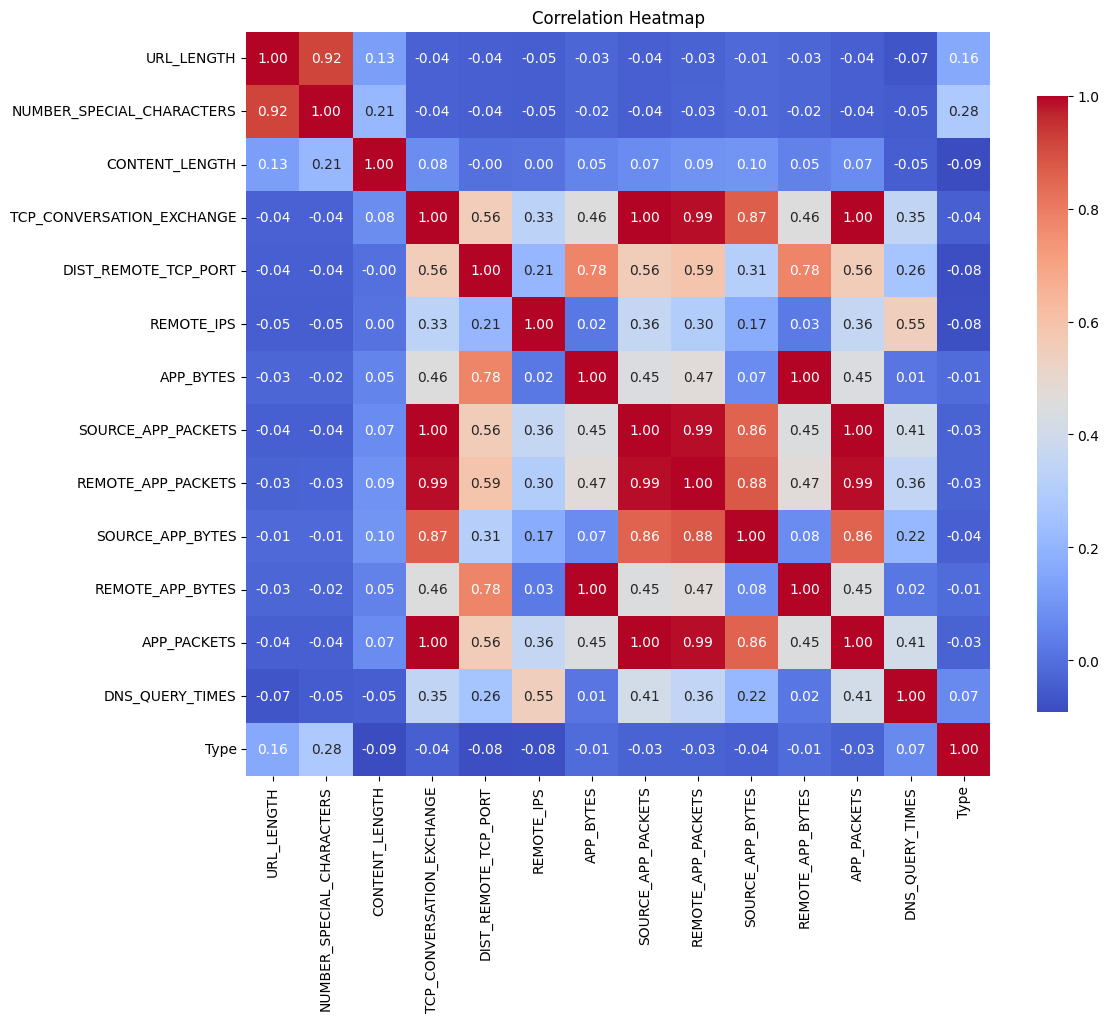

Highly correlated columns:
                     Feature 1                  Feature 2  Correlation
0                  URL_LENGTH                 URL_LENGTH     1.000000
1                  URL_LENGTH  NUMBER_SPECIAL_CHARACTERS     0.917986
2   NUMBER_SPECIAL_CHARACTERS                 URL_LENGTH     0.917986
3   NUMBER_SPECIAL_CHARACTERS  NUMBER_SPECIAL_CHARACTERS     1.000000
4              CONTENT_LENGTH             CONTENT_LENGTH     1.000000
5   TCP_CONVERSATION_EXCHANGE  TCP_CONVERSATION_EXCHANGE     1.000000
6   TCP_CONVERSATION_EXCHANGE         SOURCE_APP_PACKETS     0.997796
7   TCP_CONVERSATION_EXCHANGE         REMOTE_APP_PACKETS     0.990848
8   TCP_CONVERSATION_EXCHANGE           SOURCE_APP_BYTES     0.865580
9   TCP_CONVERSATION_EXCHANGE                APP_PACKETS     0.997796
10       DIST_REMOTE_TCP_PORT       DIST_REMOTE_TCP_PORT     1.000000
11                 REMOTE_IPS                 REMOTE_IPS     1.000000
12                  APP_BYTES                  APP_BYTES     1

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
websites = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-en/website.csv')

# Display the column names in the dataset
print("Columns in the dataset:", websites.columns.tolist())

# Select only numeric columns for correlation
numeric_columns = websites.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns for correlation:", numeric_columns.tolist())

# Create a correlation matrix for numeric columns
correlation_matrix = websites[numeric_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

# Identify and comment on columns with high collinearity
threshold = 0.8  # Set a threshold for high collinearity
high_collinearity = correlation_matrix[correlation_matrix.abs() > threshold].stack().reset_index()
high_collinearity.columns = ['Feature 1', 'Feature 2', 'Correlation']
print("Highly correlated columns:\n", high_collinearity)

# Comment on columns to remove due to high collinearity
# You can add your comments here based on the output


### This is an example to know the feacture importance using a ML model

In [112]:
#! pip install xgboost

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [113]:
X = websites._get_numeric_data().drop('Type', axis=1)
y = websites.Type

In [114]:
xgb.fit(X,y)

AttributeError: module 'xgboost' has no attribute 'fit'

In [40]:
sort_idx = xgb.feature_importances_.argsort()

NameError: name 'xgb' is not defined

In [41]:
plt.barh(X.columns[sort_idx],xgb.feature_importances_[sort_idx])
plt.show();

NameError: name 'sort_idx' is not defined

    In the previous plot we can see the feactures with lower weight in the dataset.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

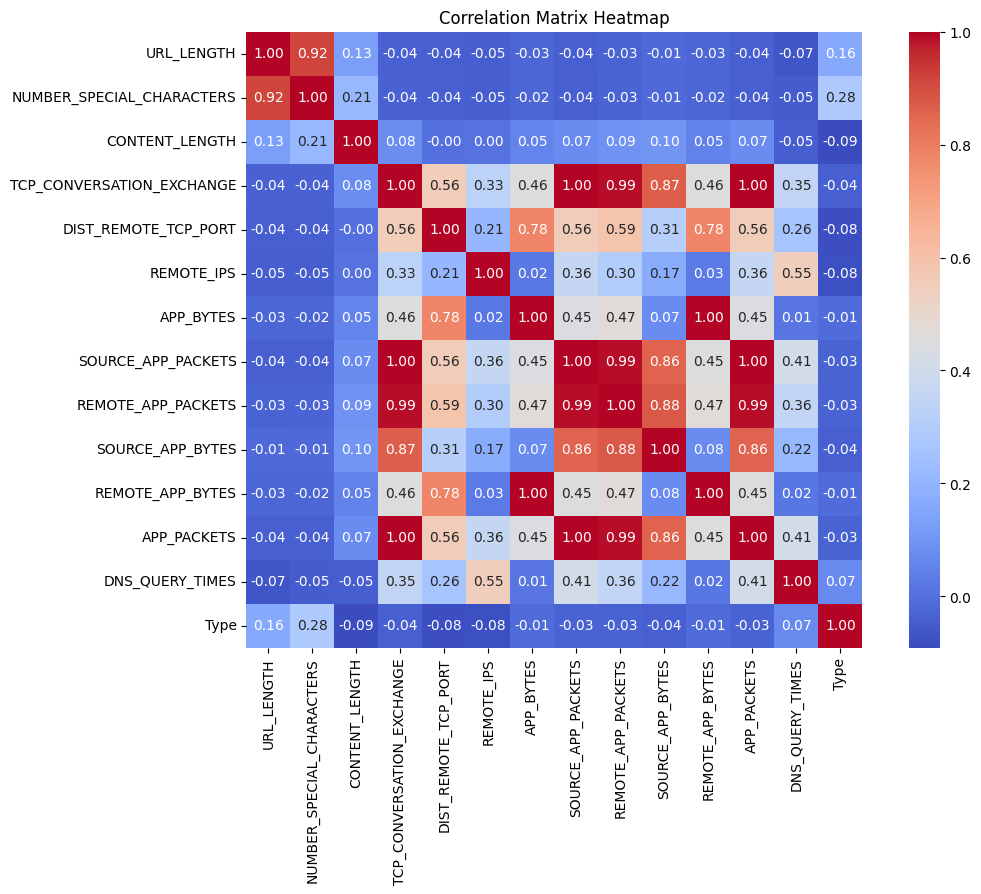

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
websites = pd.read_csv('C:/Users/falabella/GIT/lab-supervised-learning-en/website.csv')

# Step 1: Filter the dataset to include only numeric columns
numeric_websites = websites.select_dtypes(include='number')

# Step 2: Create a correlation matrix for numeric columns
correlation_matrix = numeric_websites.corr()

# Step 3: Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

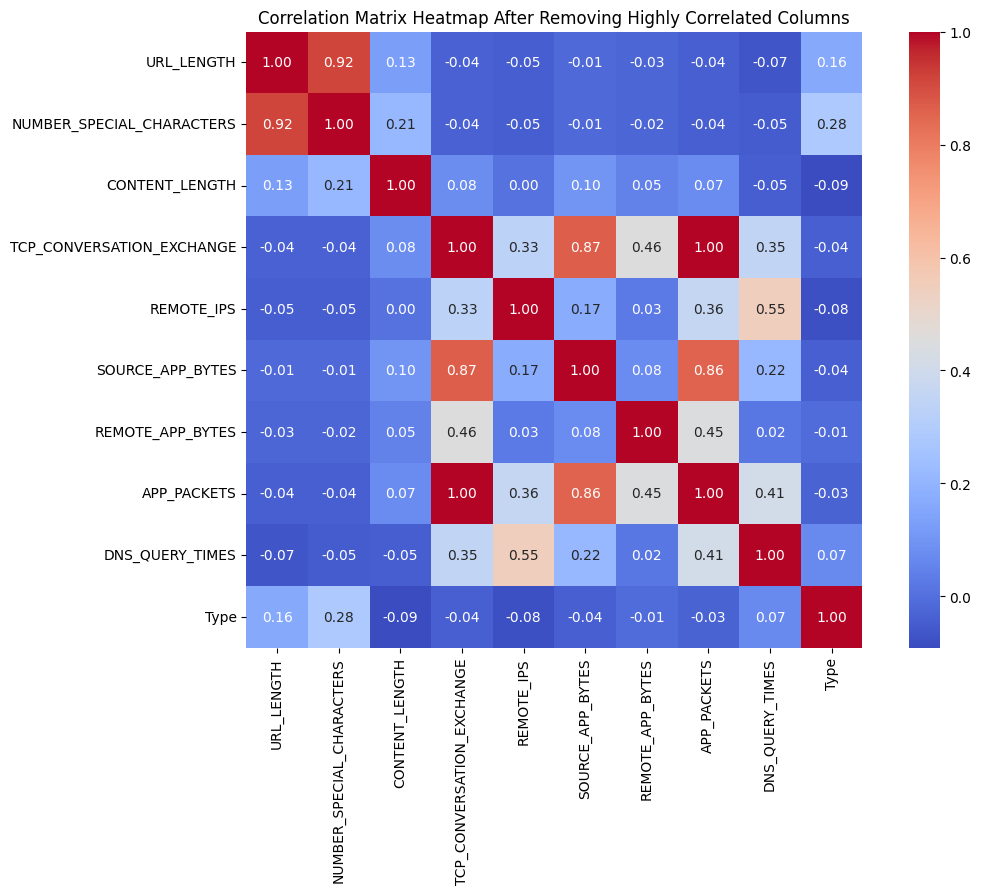

In [49]:
# REMOVE THE 4 COLUMNS WITH MORE COLLINEARITY

# Step 1: Identify columns to remove based on correlation
# Let's assume from the heatmap you found these four columns with high collinearity:
columns_to_remove = ['APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'DIST_REMOTE_TCP_PORT']

# Step 2: Remove the identified columns from the DataFrame
websites_cleaned = websites.drop(columns=columns_to_remove)

# Step 3: Create a new correlation matrix for the cleaned dataset
numeric_websites_cleaned = websites_cleaned.select_dtypes(include='number')
correlation_matrix_cleaned = numeric_websites_cleaned.corr()

# Step 4: Generate a heatmap to visualize the correlation matrix again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap After Removing Highly Correlated Columns')
plt.show()

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [50]:
# Step 1: Check for missing values in the dataset
missing_values = websites_cleaned.isnull().sum()

# Step 2: Display the number of missing values for each column
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64


In [52]:
# Firts we will drop the columns with more than 50% of missing data

# Step 1: Calculate the threshold for 50% missing values
threshold = 0.5 * len(websites_cleaned)

# Step 2: Drop columns with more than 50% missing data
columns_to_drop = [col for col in websites_cleaned.columns if websites_cleaned[col].isnull().sum() > threshold]

# Step 3: Drop the identified columns from the DataFrame
websites_cleaned = websites_cleaned.drop(columns=columns_to_drop)

# Step 4: Display the remaining columns and the number of missing values
remaining_missing_values = websites_cleaned.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]  # Filter out columns with no missing values

print("Columns dropped due to more than 50% missing data:", columns_to_drop)
print("\nRemaining missing values in each column:\n", remaining_missing_values)

Columns dropped due to more than 50% missing data: []

Remaining missing values in each column:
 CHARSET                 7
SERVER                176
CONTENT_LENGTH        812
WHOIS_COUNTRY         306
WHOIS_STATEPRO        362
WHOIS_REGDATE         127
WHOIS_UPDATED_DATE    139
DNS_QUERY_TIMES         1
dtype: int64


In [53]:
# Now we will drop the rows with missing data

# Step 1: Drop rows with any missing data
websites_cleaned = websites_cleaned.dropna()

# Step 2: Check the shape of the cleaned DataFrame
print("Shape of the dataset after dropping rows with missing data:", websites_cleaned.shape)

# Step 3: Verify there are no missing values remaining
remaining_missing_values = websites_cleaned.isnull().sum()
print("\nRemaining missing values in each column:\n", remaining_missing_values[remaining_missing_values > 0])

Shape of the dataset after dropping rows with missing data: (636, 17)

Remaining missing values in each column:
 Series([], dtype: int64)


#### Again, examine the number of missing values in each column. 

    If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [55]:
# Examine missing values in each column
missing_values = websites_cleaned.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("All columns are cleaned. There are no missing values.")
else:
    print("Missing values in each column:\n", missing_values)

All columns are cleaned. There are no missing values.


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [56]:
websites.WHOIS_COUNTRY.value_counts()

WHOIS_COUNTRY
US                1103
CA                  84
ES                  63
AU                  35
PA                  21
GB                  19
JP                  11
UK                  10
IN                  10
CN                  10
CZ                   9
FR                   9
NL                   6
CH                   6
KR                   5
[u'GB'; u'UK']       5
ru                   4
BS                   4
AT                   4
PH                   4
us                   3
SC                   3
DE                   3
BE                   3
HK                   3
TR                   3
SE                   3
KY                   3
RU                   2
NO                   2
SI                   2
IL                   2
KG                   2
BR                   2
UA                   2
Cyprus               2
UY                   2
se                   1
LU                   1
TH                   1
UG                   1
LV                   1
United Kingdom      

In [61]:
# Step 1: List out the unique values of WHOIS_COUNTRY
unique_countries = websites.WHOIS_COUNTRY.unique()
print("Unique values in WHOIS_COUNTRY before consolidation:", unique_countries)

# Step 2: Consolidate the country values using the mapping
good_country = {'None':'None', 
                'US':'US', 
                'SC':'SC', 
                'GB':'UK', 
                'UK':'UK', 
                'RU':'RU', 
                'AU':'AU', 
                'CA':'CA',
                'PA':'PA',
                'se':'SE', 
                'IN':'IN',
                'LU':'LU', 
                'TH':'TH', 
                "[u'GB'; u'UK']":'UK', 
                'FR':'FR',
                'NL':'NL',
                'UG':'UG', 
                'JP':'JP', 
                'CN':'CN', 
                'SE':'SE',
                'SI':'SI', 
                'IL':'IL', 
                'ru':'RU', 
                'KY':'KY', 
                'AT':'AT', 
                'CZ':'CZ', 
                'PH':'PH', 
                'BE':'BE', 
                'NO':'NO', 
                'TR':'TR', 
                'LV':'LV',
                'DE':'DE', 
                'ES':'ES', 
                'BR':'BR', 
                'us':'US', 
                'KR':'KR', 
                'HK':'HK', 
                'UA':'UA', 
                'CH':'CH', 
                'United Kingdom':'UK',
                'BS':'BS', 
                'PK':'PK', 
                'IT':'IT', 
                'Cyprus':'CY', 
                'BY':'BY', 
                'AE':'AE', 
                'IE':'IE', 
                'UY':'UY', 
                'KG':'KG'}

# Apply the mapping to consolidate country values
websites.WHOIS_COUNTRY = websites.WHOIS_COUNTRY.apply(lambda x: good_country.get(x, x))  # Using get to avoid KeyError

# Step 3: Check the unique values again after consolidation
unique_countries_after = websites.WHOIS_COUNTRY.unique()
print("Unique values in WHOIS_COUNTRY after consolidation:", unique_countries_after)

Unique values in WHOIS_COUNTRY before consolidation: [nan 'US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']
Unique values in WHOIS_COUNTRY after consolidation: [nan 'US' 'SC' 'UK' 'RU' 'AU' 'CA' 'PA' 'SE' 'IN' 'LU' 'TH' 'FR' 'NL' 'UG'
 'JP' 'CN' 'SI' 'IL' 'KY' 'AT' 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES'
 'BR' 'KR' 'HK' 'UA' 'CH' 'BS' 'PK' 'IT' 'CY' 'BY' 'AE' 'IE' 'UY' 'KG']


In [60]:
websites.WHOIS_COUNTRY.unique()

array([nan, 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [64]:
def print_bar_plot(x, y):
    plt.figure(figsize=(15, 8))  # Set figure size before plotting
    plt.bar(x, y)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.xlabel('Countries')
    plt.ylabel('Counts')
    plt.title('Distribution of WHOIS_COUNTRY')
    plt.show()

# Prepare the data for the plot
countries = websites.WHOIS_COUNTRY.value_counts()

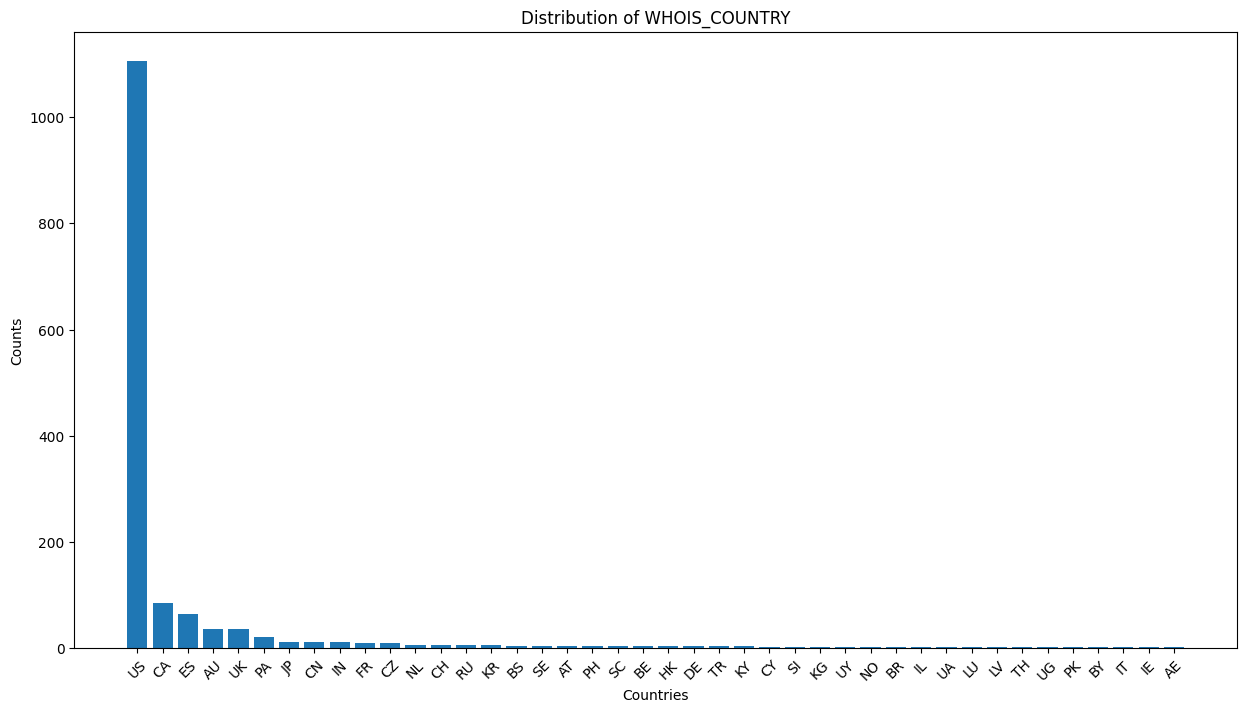

In [66]:
print_bar_plot(countries.index, countries.values)

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [68]:
# Step 1: Get the top 10 countries
top_10_countries = websites.WHOIS_COUNTRY.value_counts().nlargest(10).index

# Step 2: Create a mapping to replace other countries with 'OTHER'
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

# Step 3: Verify the changes
print("Unique values in WHOIS_COUNTRY after re-labeling:", websites.WHOIS_COUNTRY.unique())
print("Value counts in WHOIS_COUNTRY after re-labeling:\n", websites.WHOIS_COUNTRY.value_counts())

Unique values in WHOIS_COUNTRY after re-labeling: ['OTHER' 'US' 'UK' 'AU' 'CA' 'PA' 'IN' 'JP' 'CN' 'ES']
Value counts in WHOIS_COUNTRY after re-labeling:
 WHOIS_COUNTRY
US       1106
OTHER     406
CA         84
ES         63
AU         35
UK         35
PA         21
JP         11
IN         10
CN         10
Name: count, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [69]:
# Dropping the specified columns
websites = websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1)

# Verify the columns after dropping
print("Columns after dropping specified ones:\n", websites.columns)

Columns after dropping specified ones:
 Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [75]:
# Check the data types of the websites DataFrame
print("Data Types of the DataFrame:")
print(websites.dtypes)

# Check specifically for the remaining categorical columns
remaining_categorical_cols = ['URL', 'CHARSET', 'SERVER']
print("\nRemaining Categorical Columns:")
print(websites[remaining_categorical_cols].dtypes)

Data Types of the DataFrame:
URL                          float64
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                      float64
SERVER                       float64
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Remaining Categorical Columns:
URL        float64
CHARSET    float64
SERVER     float64
dtype: object


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [76]:
# Drop the 'URL' column from the websites DataFrame
websites.drop(columns=['URL'], inplace=True)

# Verify the column has been dropped
print("Columns after dropping 'URL':")
print(websites.columns)

Columns after dropping 'URL':
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [77]:
# Print the unique value counts of the 'CHARSET' column
charset_value_counts = websites['CHARSET'].value_counts()
print("Unique Value Counts of 'CHARSET':")
print(charset_value_counts)

Unique Value Counts of 'CHARSET':
CHARSET
2.0    676
1.0    427
5.0    379
4.0    155
3.0    134
6.0      1
0.0      1
7.0      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [78]:
# Print the unique values of the 'SERVER' column in the websites DataFrame
server_unique_values = websites['SERVER'].unique()
print("Unique Values in 'SERVER':")
print(server_unique_values)

Unique Values in 'SERVER':
[199.  61. 115.  nan  17. 209.   7.  30.  75. 233.  35.  96. 216.  67.
 124. 147. 223. 232. 108. 127. 228. 210.  46. 118. 112.  82. 236.  20.
  36.  28.  76.  78. 106.  74.  77.  38. 139.  71.  62.  91. 138.  72.
   6.  14.   2.  44.  47. 100. 135. 111.  90.  50.  60.   9. 163.  58.
  13.  52. 110.  53.  66. 107.  48. 114. 103. 188. 137.  73. 201. 198.
  59. 192. 104.  18.  41.  11.  23. 206.   3.  51. 220.  49.  24.  27.
  15. 133. 120.  70.  87.  33. 144. 215. 214. 208. 229. 213. 136. 141.
   8. 143. 165. 178.  39. 222. 200. 130. 187. 234. 160. 204.  83. 183.
  10. 190. 155. 140. 131. 164. 121. 195.  88. 169. 159. 177.  84. 217.
 146. 156.  79. 105. 126. 212.  80. 154. 189. 149. 181. 196. 185.  57.
 150.  55.  86. 194.  12. 151. 186.  85.   5. 193. 211. 125. 218. 231.
  32. 129. 175.  65.  97.  22. 134. 153. 202. 174. 235. 207. 123. 145.
  42.  34.  45. 157.   0. 161.  95. 170. 176. 158. 117.  16.   4. 225.
  63. 168.  93.  29.  89. 180. 167. 219.  94.  81.

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [81]:
# Count `SERVER` value counts here

# Count the occurrences of each unique value in the 'SERVER' column
server_value_counts = websites['SERVER'].value_counts()

# Print the counts
print("Value Counts of 'SERVER':")
print(server_value_counts)

Value Counts of 'SERVER':
SERVER
7.0      386
199.0    211
115.0    113
147.0     94
118.0     51
        ... 
122.0      1
109.0      1
69.0       1
119.0      1
31.0       1
Name: count, Length: 238, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [82]:
# Use get_dummies to convert categorical data to dummy variables
website_dummy = pd.get_dummies(websites, drop_first=True)

# Display the first few rows of the new DataFrame to verify the changes
print("First few rows of the website_dummy DataFrame:")
print(website_dummy.head())

# Print the columns of the new DataFrame to see the dummy variables
print("\nColumns in website_dummy:")
print(website_dummy.columns)

First few rows of the website_dummy DataFrame:
   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  CHARSET  SERVER  CONTENT_LENGTH  \
0          16                          7      3.0   199.0           263.0   
1          16                          6      2.0    61.0         15087.0   
2          16                          6      4.0   115.0           324.0   
3          17                          6      1.0   199.0           162.0   
4          17                          6      2.0     NaN        124140.0   

   TCP_CONVERSATION_EXCHANGE  DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  \
0                          7                     0           2        700   
1                         17                     7           4       1230   
2                          0                     0           0          0   
3                         31                    22           3       3812   
4                         57                     2           5       4278   

   SOURCE_APP_PACKETS  ... 

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [83]:
# Inspect the website_dummy DataFrame to check the data types and first few rows
print("Data Types and Info of website_dummy:")
print(website_dummy.info())

print("\nFirst few rows of website_dummy:")
print(website_dummy.head())

Data Types and Info of website_dummy:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   CHARSET                    1774 non-null   float64
 3   SERVER                     1605 non-null   float64
 4   CONTENT_LENGTH             969 non-null    float64
 5   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 6   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 7   REMOTE_IPS                 1781 non-null   int64  
 8   APP_BYTES                  1781 non-null   int64  
 9   SOURCE_APP_PACKETS         1781 non-null   int64  
 10  REMOTE_APP_PACKETS         1781 non-null   int64  
 11  SOURCE_APP_BYTES           1781 non-null   int64  
 12  REMOTE_APP_BYTES           1781 non-null   int64  
 13  APP_PACKET

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [86]:
print("Columns in website_dummy:")
print(website_dummy.columns)

Columns in website_dummy:
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type', 'WHOIS_COUNTRY_CA', 'WHOIS_COUNTRY_CN',
       'WHOIS_COUNTRY_ES', 'WHOIS_COUNTRY_IN', 'WHOIS_COUNTRY_JP',
       'WHOIS_COUNTRY_OTHER', 'WHOIS_COUNTRY_PA', 'WHOIS_COUNTRY_UK',
       'WHOIS_COUNTRY_US'],
      dtype='object')


In [89]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = website_dummy.drop(columns=['Type'])  # Features
y = website_dummy['Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Shapes of the resulting datasets:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Shapes of the resulting datasets:
X_train shape: (1424, 24)
X_test shape: (357, 24)
y_train shape: (1424,)
y_test shape: (357,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [90]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence if needed

# Display the initialized model
print("Initialized Logistic Regression Model:")
print(logistic_model)

Initialized Logistic Regression Model:
LogisticRegression(max_iter=1000)


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [98]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create an imputer object with a strategy for filling missing values (mean in this case)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the data
X_train_imputed = imputer.fit_transform(X_train)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the imputed training data
logistic_model.fit(X_train_imputed, y_train)

# Confirm that the model has been fitted
print("Logistic Regression model has been fitted to the imputed training data.")

Logistic Regression model has been fitted to the imputed training data.


c:\Users\falabella\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the testing data (ensure to impute the test set as well if you imputed the training set)
X_test_imputed = imputer.transform(X_test)  # Impute the test set if using imputer

# Predict the labels for the test set
y_pred = logistic_model.predict(X_test_imputed)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[297   9]
 [ 21  30]]

Accuracy Score: 0.9159663865546218


What are your thoughts on the performance of the model? Write your conclusions below.

### Your conclusions here:
    The model is working fine but it have many errors in Type 2, it says that the model predict a non malicious web like a malicious web


#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [100]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with max_depth=3
decision_tree_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
decision_tree_model.fit(X_train_imputed, y_train)

# Confirm that the model has been fitted
print("Decision Tree model has been fitted to the training data.")

Decision Tree model has been fitted to the training data.


To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute predicted probabilities for the test set
y_pred_prob = decision_tree_model.predict_proba(X_test_imputed)[:, 1]  # Get probabilities for the positive class

# Decide 0 or 1 using a threshold of 0.5
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:", accuracy)

Confusion Matrix:
[[296  10]
 [ 24  27]]

Accuracy Score: 0.9047619047619048


#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [102]:
# Initialize the Decision Tree Classifier with max_depth=5
decision_tree_model_5 = DecisionTreeClassifier(max_depth=5)

# Fit the model to the training data
decision_tree_model_5.fit(X_train_imputed, y_train)

# Compute predicted probabilities for the test set
y_pred_prob_5 = decision_tree_model_5.predict_proba(X_test_imputed)[:, 1]  # Get probabilities for the positive class

# Decide 0 or 1 using a threshold of 0.5
y_pred_5 = (y_pred_prob_5 >= 0.5).astype(int)

# Calculate the confusion matrix
conf_matrix_5 = confusion_matrix(y_test, y_pred_5)

# Calculate the accuracy score
accuracy_5 = accuracy_score(y_test, y_pred_5)

# Print the confusion matrix and accuracy score
print("Confusion Matrix for max_depth=5:")
print(conf_matrix_5)
print("\nAccuracy Score for max_depth=5:", accuracy_5)

Confusion Matrix for max_depth=5:
[[303   3]
 [ 28  23]]

Accuracy Score for max_depth=5: 0.9131652661064426


Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

### Your conclusions here:


**Answer:**

- Confusion Matrix: When increasing the max_depth of the Decision Tree model from 3 to 5, the confusion matrix should be examined to identify any changes in the distribution of true positives, true negatives, false positives, and false negatives. A decrease in Type 2 errors (false negatives) would indicate an improvement in the model's ability to correctly classify malicious websites.

- Accuracy Score: The accuracy score serves as a quantitative measure of the model's performance. If the accuracy score increased when changing the max_depth to 5, it would suggest that the model is making more correct predictions overall. However, it's also essential to consider whether the increase in accuracy is at the cost of an increase in Type 1 errors (false positives).

- Overfitting Concerns: While increasing the max_depth can improve accuracy and reduce misclassifications, it can also lead to overfitting, where the model learns the training data too well and performs poorly on unseen data. Monitoring the confusion matrix alongside accuracy can help identify this issue.

- Model Improvement: If the model showed improvement in both the confusion matrix and accuracy score, it would indicate that allowing more depth helped the model learn more complex patterns. However, if the improvements are marginal or come with increased false positives, further tuning or exploring alternative models might be necessary.

- Next Steps: Depending on the results, you could further experiment with hyperparameters (e.g., min_samples_split, min_samples_leaf) or try different algorithms (like Random Forests or Gradient Boosting) to see if they yield better results.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [103]:
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_imputed)

# Transform the testing data
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the Logistic Regression model
logistic_model_scaled = LogisticRegression()

# Fit the model to the scaled training data
logistic_model_scaled.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_scaled = logistic_model_scaled.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print the accuracy score and confusion matrix
print("Accuracy Score with Feature Scaling:", accuracy_scaled)
print("Confusion Matrix with Feature Scaling:")
print(confusion_matrix(y_test, y_pred_scaled))

Accuracy Score with Feature Scaling: 0.927170868347339
Confusion Matrix with Feature Scaling:
[[305   1]
 [ 25  26]]


## Comments:

Add your comments here:

Assess whether feature scaling has improved the model's accuracy. If it has, that suggests the features were on different scales, which affected the model's performance. If there was no significant change, the model might already be performing optimally given the data.